# Линейная регрессия (1D)

### Сгенерируйте синтетический набор точек вида y = ax+b+noise. Решите задачу линейной регрессии для множества точек (x, y). Поиск параметров произведите с помощью градиентного спуска. Результат — параметры линейной регрессии.

In [83]:
import numpy as np
from numpy import log, dot, e
from numpy.random import rand, multivariate_normal, shuffle
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [70]:
class LinearReg():
    
    def __init__(self, learning_rate=0.001, max_iter=10000):
        self.a = 0
        self.b = 0
        self.lr = learning_rate
        self.epochs = max_iter
    
    def fit(self, X, Y):
        n = float(len(X))
        """Gradient descent"""
        for i in range(self.epochs): 
            Y_pred = self.a*X + self.b
            self.a = self.a - self.lr * (-2/n) * sum(X * (Y - Y_pred))
            self.b = self.b - self.lr * (-2/n) * sum(Y - Y_pred)
    
    def get_coef(self):
        return self.a, self.b
    
    def predict(self, X):
        return self.a * X + self.b

In [71]:
X = np.array(range(50))
Y = 2 * X + 5 + np.random.randn(len(X))
print('X:',X)
print('Y:',Y)
lr = LinearReg()

lr.fit(X,Y)
lr.get_coef()

X: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
Y: [  4.94546167   7.24322471   8.28283673   8.79001925  14.44572239
  13.72917571  17.64393538  17.81505041  21.20923787  22.59662407
  25.62304304  27.03698892  29.67502825  30.73084608  32.49544997
  34.54442565  37.79286088  39.37657777  39.46284296  42.82773766
  45.04773702  47.606996    47.46162416  51.15044413  52.25564861
  54.55926301  56.75842887  58.627767    60.47783916  62.00870266
  65.13112039  67.56490432  69.40332172  70.90287185  71.69203331
  76.09080972  78.28075949  81.33534957  82.75560108  82.4213092
  82.46966439  87.0324649   88.75192229  88.71469347  93.28255163
  93.66712664  96.09192835 101.37286514 100.82850542 100.75992472]


(1.9997562485712903, 4.814254481630672)

# Логистическая регрессия (2D)

### Сгенерируйте два синтетических набора точек на плоскости, добавьте им метки классов (2 класса). Визуализируйте множества (matplotlib). Разделите данные на тренировочный и тестовый набор. Реализуйте логистическую регрессию. Проверьте точность полученного алгоритма с помощью метрики accuracy (на тестовом множестве).

In [86]:
'''generation'''
labels = np.random.randint(0, 2, 100)
noise = 0.6
x = (np.random.rand(100) + labels) / 2
y = x + np.random.rand(100) * noise

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
labels = labels.reshape(-1, 1)
data= np.hstack([np.ones_like(x),x,y,labels])

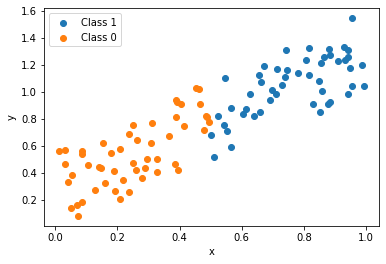

In [87]:
plt.scatter(data[:,1][data[:,3] ==1], data[:,2][data[:,3] ==1], label='Class 1')
plt.scatter(data[:,1][data[:,3] ==0], data[:,2][data[:,3] ==0], label='Class 0')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### split data

In [88]:
np.random.shuffle(data)
train_x,train_y = data[:,[0,1,2]][:70],data[:,3][:70]
test_x,test_y = data[:,[0,1,2]][70:],data[:,3][70:]


### sigmoid

In [89]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [90]:
def log_reg(X,y):
    learning_rate=0.01
    n_iters=5000
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    for i in range(n_iters):
        y_predicted = sigmoid(X @ weights)        
        weights = weights - (learning_rate / n_samples) * (X.T @ (y_predicted - y) )

    return weights

In [91]:
def predict(X, weights):
    y_predicted = sigmoid(np.dot(X, weights))
    predicted_labels = np.array([1 if i > 0.5 else 0 for i in y_predicted])
    return predicted_labels

In [92]:
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

### train model

In [93]:
weights = log_reg(train_x,train_y)
#test_y_predicted = predict(test_x,weights)


### accuracy

In [94]:
accuracy(test_y,predict(test_x,weights))

0.8

In [95]:
weights

array([-2.34076959,  2.83008264,  1.54280869])

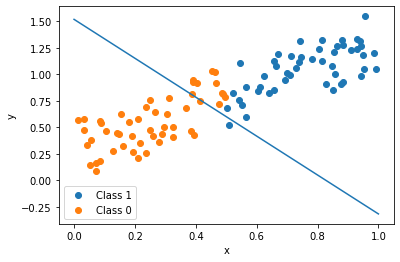

In [96]:
x = np.linspace(0,1, 15)

c,a,b = weights# weights

y = -(a*x+c)/b
plt.scatter(data[:,1][data[:,3] ==1], data[:,2][data[:,3] ==1], label='Class 1')
plt.scatter(data[:,1][data[:,3] ==0], data[:,2][data[:,3] ==0], label='Class 0')
plt.plot(x,y)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Дерево принятия решений (2D)


### Рассмотрите те же данные, что и в задании 2. Разделите точки на классы с помощью алгоритма CART(gini criterion). Ограничьте глубину дерева (по вашему выбору). Проверьте точность полученного алгоритма с помощью метрики accuracy на тестовом наборе.

In [154]:
'''generation'''
labels = np.random.randint(0, 2, 200)
noise = 0.6
x = (np.random.rand(200) + labels) / 2
y = x*(-1) + np.random.rand(200) * noise

x = x.reshape(-1, 1)*200
y = y.reshape(-1, 1)*200
labels = labels.reshape(-1, 1)
data= np.hstack([x,y,labels]).astype("int")

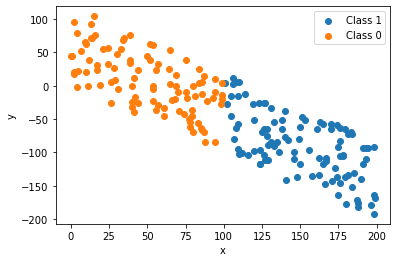

In [155]:
plt.scatter(data[:,0][data[:,2] ==1], data[:,1][data[:,2] ==1], label='Class 1')
plt.scatter(data[:,0][data[:,2] ==0], data[:,1][data[:,2] ==0], label='Class 0')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### split data

In [156]:
np.random.shuffle(data)
train_x,train_y = data[:,[0,1]][:70],data[:,2][:70]
test_x,test_y = data[:,[0,1]][70:],data[:,2][70:]


In [157]:
def entropy(y):
    hist = np.bincount(y)
    ps = hist / len(y)
    return -np.sum([p * np.log2(p) for p in ps if p > 0])

In [158]:
class DecisionTree:

    def __init__(self, min_samples_split=2, max_depth=100, n_feats=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.root = None

    def fit(self, X, y):
        if not self.n_feats:
            self.n_feats = X.shape[1]
        else:
            self.n_feats = min(self.n_feats, X.shape[1])
        # taking X and y
        # creating tree
        self.root = self._create_tree(X, y)

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _create_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # stopping  working
        if (depth >= self.max_depth or n_labels == 1  or n_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y)
            # returning Node
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_features, self.n_feats, replace=False)

        # greedily select the best split according to information gain
        best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)
        
        # grow the children that result from the split
        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
        left = self._create_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._create_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feat, best_thresh, left, right)

    def _best_criteria(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold

        return split_idx, split_thresh

    def _information_gain(self, y, X_column, split_thresh):
        # parent loss
        parent_entropy = entropy(y)

        # generate split
        left_idxs, right_idxs = self._split(X_column, split_thresh)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        # compute the weighted avg. of the loss for the children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = entropy(y[left_idxs]), entropy(y[right_idxs])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r

        # information gain is difference in loss before vs. after split
        ig = parent_entropy - child_entropy
        return ig

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common
    
    
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None

In [159]:
from sklearn.model_selection import train_test_split

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

clf = DecisionTree(max_depth=10)
clf.fit(train_x,train_y )
    
y_pred = clf.predict(test_x)
acc = accuracy(test_y,y_pred)

print ("Accuracy:", acc)

Accuracy: 0.9769230769230769
